In [1]:
# The problem at hand: The major aim of this project is to predict which of the customers will have their loan paid or not. 
# Therefore, this is a supervised classification problem to be trained with algorithms like:

# 1) Logistic Regression
# 2) Decision Tree

In [2]:
# import any neccessary libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# open file 
df = pd.read_csv("Loan.csv")

In [4]:
# view the data 
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
# check the data type 
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# check the basic stats of the data 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# check for missing value 
df.isnull().sum().sort_values(ascending=True)

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

In [8]:
# cleaning missing values 

# categorical values: replacing missing values with mode
df['Gender'].fillna(df['Gender'].dropna().mode().values[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0], inplace=True)
df['Married'].fillna(df['Married'].dropna().mode().values[0], inplace=True)

# numeric values: replacing missing values with mean 
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [9]:
# checking if any null values are still appearing
df.isnull().sum().sort_values(ascending=True)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# reviweing the shape of the data 
df.shape

(614, 13)

<AxesSubplot:xlabel='count', ylabel='Married'>

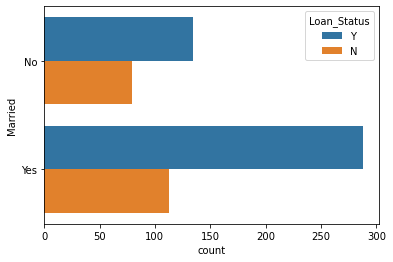

In [11]:
# EDA: exploring the data by using graphs 

# finding the differences in loan status with the number of married people 
sns.countplot(y='Married', hue='Loan_Status', data= df)

<AxesSubplot:xlabel='count', ylabel='Gender'>

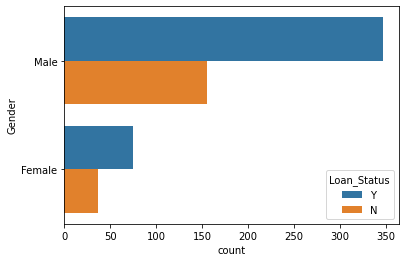

In [12]:
# finding the difference in loan status and gender 
sns.countplot(y= 'Gender', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='count', ylabel='Education'>

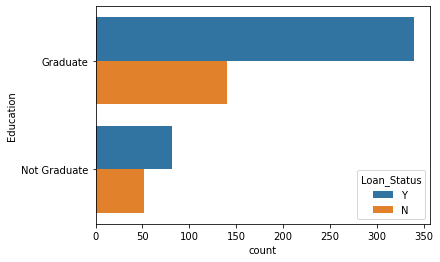

In [13]:
# finding the difference in the amount of people with qualification that approved for loan
sns.countplot(y='Education', hue='Loan_Status', data=df)

In [14]:
# Data modelling: import any necessary libraries 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LogisticRegression 

In [15]:
# Selecting for data modelling 

# predict target 
label_encoder = LabelEncoder()
df['Loan_Status_New'] = label_encoder.fit_transform(df['Loan_Status'])
y = df['Loan_Status_New']

# feature that are inputted in the modelling 
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
X = df[features]

In [16]:
# Model Validation using Decision tree 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
df_model = DecisionTreeRegressor(random_state = 1)
df_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [17]:
# Model Prediction using Decision tree
y_pred = df_model.predict(X_test)
y_pred

array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1.])

In [18]:
# Model Evaluation using f1_score on Decision Tree 
evaluate = f1_score(y_test, y_pred)
evaluate

0.7692307692307693

In [25]:
# Model Validation using Logistic Regression 
df_model = LogisticRegression(random_state=1)
df_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [26]:
# Model Prediction using Logistic Regression 
y_pred = df_model.predict(X_test)

In [27]:
# Model Evaluation using f1_score on Logistic Regression 
evaluate = f1_score(y_test, y_pred)
evaluate 

0.8979591836734695